<a href="https://colab.research.google.com/github/NicksonIndiani/JobsSalary2024DS/blob/main/Data_Science_Trabalhos_%26_Salarios_2024_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv('Data.csv')
df.to_csv('data.csv', sep=',', index=False)

In [3]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [5]:
df.dropna(subset=['Salary', 'Logo', 'Company Rating'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        387 non-null    int64  
 1   Job Title       387 non-null    object 
 2   Company Name    387 non-null    object 
 3   Location        387 non-null    object 
 4   Salary          387 non-null    object 
 5   Date            387 non-null    object 
 6   Logo            387 non-null    object 
 7   Job Link        387 non-null    object 
 8   Company Rating  387 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 30.2+ KB


In [13]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [27]:
df.tail()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
490,491,Data Engineer,Inspur USA Inc.\n3.6,"Seattle, WA",NaN,24h,https://media.glassdoor.com/sql/420877/inspur-...,https://www.glassdoor.com/partner/jobListing.h...,3.0
491,492,"Manager, Data Science Platform Engineering",Dave Inc.\n4.0,Remote,220000.0,30d+,https://media.glassdoor.com/sql/1847431/dave-s...,https://www.glassdoor.com/partner/jobListing.h...,4.0
494,495,Analytics Solution Owner,Network Coverage\n4.4,Remote,100000.0,30d+,https://media.glassdoor.com/sql/1839638/networ...,https://www.glassdoor.com/partner/jobListing.h...,4.0
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",84500.0,30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.0
499,500,Quantitative Analytics Manager - Data Modeling...,Freddie Mac\n3.6,"McLean, VA",175000.0,5d,https://media.glassdoor.com/sql/1585/freddie-m...,https://www.glassdoor.com/partner/jobListing.h...,3.0


In [20]:
def convert_salary(salary_str):
    # Remover os termos '(Glassdoor est.)' e '(Employer est.)'
    salary_str = re.sub(r'\s*\(Glassdoor est\.\)\s*', '', salary_str)
    salary_str = re.sub(r'\s*\(Employer est\.\)\s*', '', salary_str)

    # Extrair os valores numéricos da faixa salarial
    salary_range = re.findall(r'[\d]+K', salary_str)

    if len(salary_range) == 2:
        # Converter os valores para numéricos
        min_salary = float(salary_range[0].replace('K', '')) * 1000
        max_salary = float(salary_range[1].replace('K', '')) * 1000
        # Calcular a média da faixa salarial
        avg_salary = (min_salary + max_salary) / 2
        return avg_salary
    elif len(salary_range) == 1:
        # Converter o valor único para numérico
        return float(salary_range[0].replace('K', '')) * 1000
    else:
        return None

# Aplicar a função na coluna 'Salary'
df['Salary'] = df['Salary'].apply(convert_salary)

In [36]:
df['Company Rating'] = df['Company Rating'].astype(int)
df['Company Rating'] = df['Company Rating'].apply(lambda x: min(x, 5))

In [37]:
unique_values = df['Company Rating'].unique()
print(unique_values)

[2 3 4 1 5]


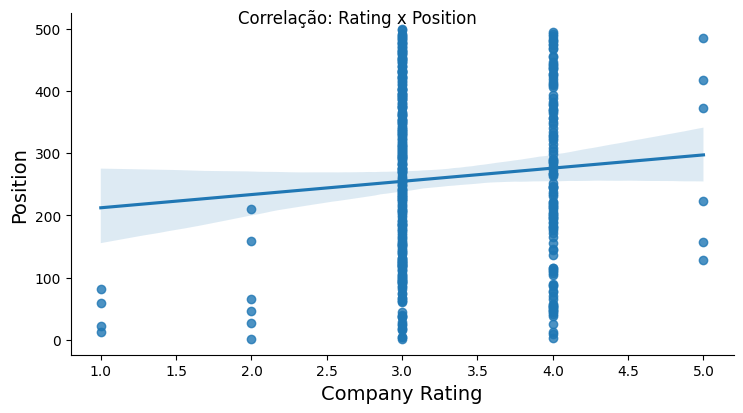

In [39]:
from pandas.io.sql import DatabaseError

ax = sns.lmplot(x='Company Rating', y='Position', data=df)
ax.fig.set_size_inches(8, 4)
ax.fig.suptitle('Correlação: Rating x Position')
ax.set_xlabels('Company Rating', fontsize = 14)
ax.set_ylabels('Position', fontsize = 14)

In [41]:
correlacao = df[['Company Rating', 'Position']].corr()

In [42]:
print(correlacao)

                Company Rating  Position
Company Rating        1.000000  0.088713
Position              0.088713  1.000000


In [43]:
import statsmodels.api as sm

In [48]:
Y = df['Company Rating']
X = sm.add_constant(df.Position)

In [49]:
resultado_regressão = sm.OLS(Y, X).fit()

In [50]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:         Company Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.054
Date:                Tue, 16 Jul 2024   Prob (F-statistic):             0.0813
Time:                        16:29:11   Log-Likelihood:                -337.69
No. Observations:                 387   AIC:                             679.4
Df Residuals:                     385   BIC:                             687.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2133      0.063     51.202      0.0

In [51]:
df["Y_Previsto"] = resultado_regressão.predict()
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating,Y_Previsto
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",70500.0,30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2,3.213658
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",131500.0,30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3,3.214028
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",123000.0,11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4,3.214398
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",101500.0,1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3,3.214769
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",118500.0,30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3,3.215139


In [53]:
df["Resíduo"] = df.Y_Previsto - df.Position
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating,Y_Previsto,Resíduo
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",70500.0,30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2,3.213658,2.213658
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",131500.0,30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3,3.214028,1.214028
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",123000.0,11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4,3.214398,0.214398
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",101500.0,1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3,3.214769,-0.785231
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",118500.0,30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3,3.215139,-1.784861
